In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [148]:
df = pd.read_csv(r'charcters_stats.csv')
df.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [9]:
df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

# 1. 능력치의 합이 가장 큰 캐릭터

In [10]:
df['Name'][df.Total == max(df.Total)]

361    Martian Manhunter
Name: Name, dtype: object

In [59]:
df.loc[361]

Name            Martian Manhunter
Alignment                    good
Intelligence                  100
Strength                      100
Speed                          96
Durability                    100
Power                         100
Combat                         85
Total                         581
Name: 361, dtype: object

In [149]:
df_bytotal = df.sort_values(by='Total', ascending=False)
df_bytotal

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


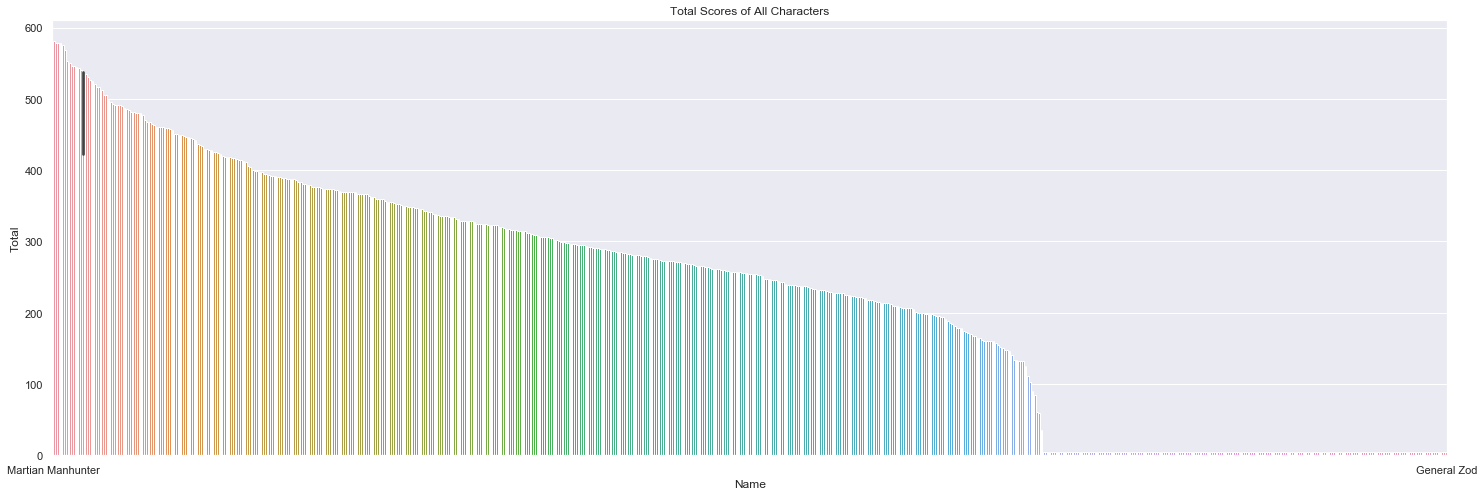

In [150]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(x='Name', y='Total', data=df_bytotal).set_title('Total Scores of All Characters')
my_xticks = ax.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible = True, rotation = "horizontal")
plt.show()

In [151]:
## Compare the top 10 strongest characters
# ref: https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
# ref2 (df.melt) : https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.melt.html
df_top10 = df_bytotal[:10]
df_top10 = df_top10.melt(id_vars=['Name'], value_vars=['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'])
df_top10.head(10)

,Name,variable,value
0,Martian Manhunter,Intelligence,100
1,General Zod,Intelligence,94
2,Superboy-Prime,Intelligence,94
3,Superman,Intelligence,100
4,Amazo,Intelligence,75
5,Stardust,Intelligence,88
6,Galactus,Intelligence,100
7,Bizarro,Intelligence,75
8,Dormammu,Intelligence,88
9,Thor,Intelligence,69


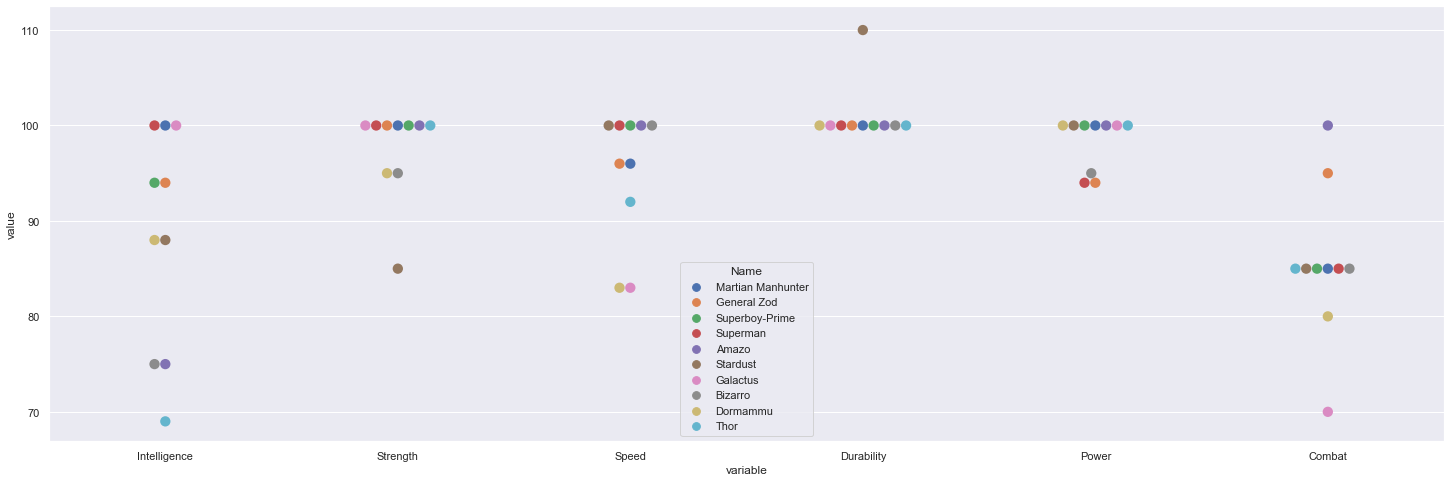

In [152]:
g = sns.swarmplot(x="variable", y="value", hue='Name', data=df_top10, size=10.3)

# 2. Good guys v.s. Bad guys

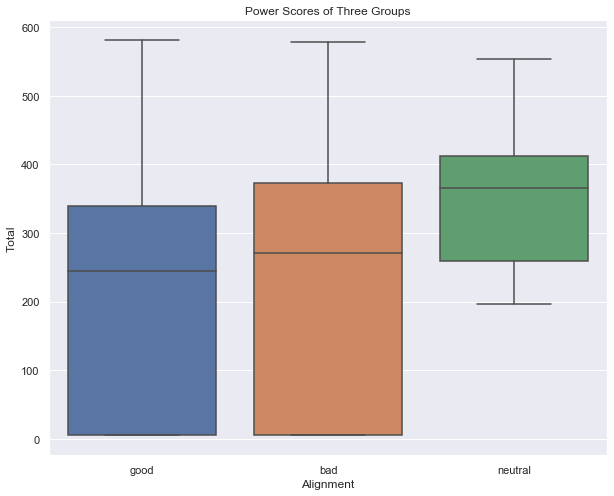

In [154]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(data=df, x='Alignment', y='Total')
plt.title('Power Scores of Three Groups')
plt.show()

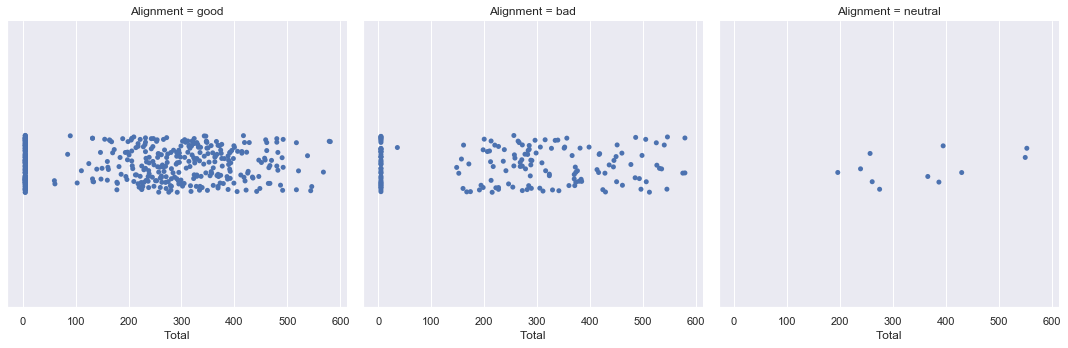

In [173]:
sns.catplot(x='Total', col='Alignment', data=df)

In [179]:
df.groupby('Alignment').mean()[['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']]

,Intelligence,Strength,Speed,Durability,Power,Combat
Alignment,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364


Text(0.5, 1.0, 'Average Abilities of Three Groups')

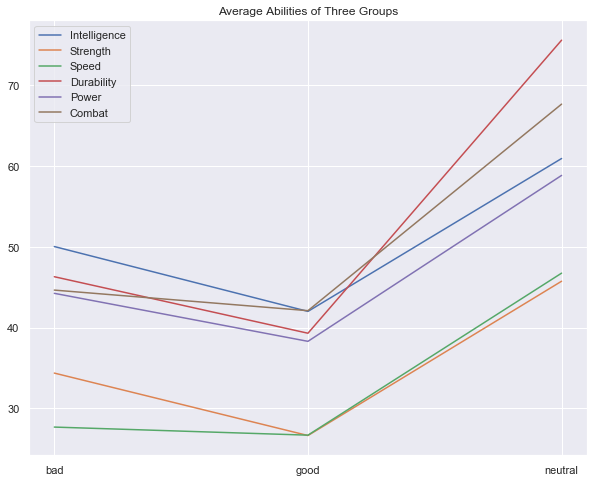

In [184]:
plt.plot(df.groupby('Alignment').mean()[['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']])
#plt.plot(df.groupby('Alignment').mean()['Total'])
plt.legend(['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'])
plt.title('Average Abilities of Three Groups')